# Example of analysis for in-text citations

## After compiling your 3 pickled dataframes from the Dataframe-Assembly notebook, here is an example flow using functions from itc_plotting. The most useful functions are shown here.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import sys
import datetime
sys.path.append("../../code")



import plotly.plotly as py
import plotly.graph_objs as go

########## to be able to plot offline (without sending the plots to the plotly server every time)
import plotly.offline as offline
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
################



from itc_plotting import *  # Nathan's routines for plotting


from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))  # to make the notebook use the entire width of the browser


In [2]:
ref_df_min = pickle.load(open('../../data/ref_dataframe_min.pkl', 'rb'))
plos_df = pickle.load(open('../../data/plos_paper_dataframe.pkl', 'rb'))
cite_df = pickle.load(open('../../data/citation_dataframe.pkl', 'rb'))
print ("done loading pickles")


### merge together the df
result = ref_df_min.join(cite_df, on='reference_UT')
ref_df = result.join(plos_df, on='paper_UT')

# Remove null reference columns (8907763 rows vs 10848620 rows)
ref_df = ref_df.loc[(ref_df['reference_UT']!='-1')]


### dump in a pickle
with open('../../data/df_reference_cite_plos_merged.pkl', 'wb') as handle:
    pickle.dump(ref_df, handle, protocol = 2)
print ("written: ../../data/df_reference_cite_plos_merged.pkl")    

done loading pickles


In [4]:
### OR (load this merged pickle)

ref_df = pickle.load(open('../../data/df_reference_cite_plos_merged.pkl', 'rb'))
print ("done loading pickles", ref_df.shape)

TypeError: 'tuple' object is not callable

In [6]:
ref_df.shape

(8907763, 42)

In [24]:
plos_df.plos_field.unique()

array(['D RO MULTIDISCIPLINARY SCIENCES',
       "['D RO MULTIDISCIPLINARY SCIENCES']",
       "['D PY MEDICINE, GENERAL & INTERNAL']",
       "['D TI PARASITOLOGY', 'D YU TROPICAL MEDICINE']",
       "['D CU BIOLOGY', 'D RO MULTIDISCIPLINARY SCIENCES']",
       'D CU BIOLOGY', "['D CU BIOLOGY']",
       'D PY MEDICINE, GENERAL & INTERNAL',
       "['D QU MICROBIOLOGY', 'D TI PARASITOLOGY', 'D ZE VIROLOGY']",
       "['D CU BIOLOGY', 'D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY']",
       "['D KM GENETICS & HEREDITY']",
       "['D CO BIOCHEMICAL RESEARCH METHODS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']",
       "['D TI PARASITOLOGY', 'D ZE VIROLOGY', 'D QU MICROBIOLOGY']",
       'D KM GENETICS & HEREDITY',
       "['D CO BIOCHEMICAL RESEARCH METHODS', 'D PO MATHEMATICS, INTERDISCIPLINARY APPLICATIONS', 'D MC MATHEMATICAL & COMPUTATIONAL BIOLOGY']",
       "['D CQ BIOCHEMISTRY & MOLECULAR BIOLOGY', 'D CU BIOLOGY']"], dtype=object)

In [67]:
df_ex.head()

,occurence,paper_UT,paper_char_pos,paper_word_pos,para_char_pos,para_char_total,para_index,para_word_pos,para_word_total,reference_UT,...,paper_char_total,paper_word_total,plos_pub_date,plos_pub_year,plos_article_type,plos_field,plos_j1,plos_j2,plos_j9,plos_ji
0,1,324515600133,139,21,139,820,0,21,130,A1995QY75100004,...,21733,3780,SEP 4,2013.0,@ Article,D RO MULTIDISCIPLINARY SCIENCES,PLOS ONE,PLOS ONE,PLOS ONE,PLoS One
1,2,324515600133,16829,2992,494,1208,24,76,188,A1995QY75100004,...,21733,3780,SEP 4,2013.0,@ Article,D RO MULTIDISCIPLINARY SCIENCES,PLOS ONE,PLOS ONE,PLOS ONE,PLoS One
2,3,324515600133,17257,3057,922,1208,24,141,188,A1995QY75100004,...,21733,3780,SEP 4,2013.0,@ Article,D RO MULTIDISCIPLINARY SCIENCES,PLOS ONE,PLOS ONE,PLOS ONE,PLoS One
3,1,324515600133,266,42,266,820,0,42,130,000222499800017,...,21733,3780,SEP 4,2013.0,@ Article,D RO MULTIDISCIPLINARY SCIENCES,PLOS ONE,PLOS ONE,PLOS ONE,PLoS One
4,2,324515600133,444,73,444,820,0,73,130,000222499800017,...,21733,3780,SEP 4,2013.0,@ Article,D RO MULTIDISCIPLINARY SCIENCES,PLOS ONE,PLOS ONE,PLOS ONE,PLoS One


In [29]:
# for item in sorted(ref_df.ref_j1.unique()):
#     print (item)

#sorted(ref_df.columns)

# for item in sorted(ref_df.plos_field.unique()):
#     print (item)
    
for item in sorted(ref_df.ref_j1.unique()):
    print (item)

-1
3 BIOTECH
4OR Q J OPE
A GRAEFES A
A I P IMMUN
A I P MICRO
A I P VIROL
A P J ALLER
A SC POL-HO
A VAN LEEUW
AAOHN J
AAPG BULL
AAPS J
AAPS PHARM
AAPS PHARMS
AATCC REV
ABA J
ABDOM IMAG
ABS PAP ACS
ABSTR APP A
ACA MANAG A
ACAD EM MED
ACAD MANAG
ACAD MED
ACAD MGMT
ACAD MGMT E
ACAD MGMT J
ACAD MGMT R
ACAD PEDIAT
ACAD PSYCHI
ACAD RADIOL
ACADEME
ACAROLOGIA
ACC ANAL PR
ACC CHEM RE
ACC ORG SOC
ACC REVIEW
ACCOUNT AUD
ACCOUNT FIN
ACCOUNT RES
ACCRED Q A
ACHOL RES-C
ACI MATER J
ACI STRUC J
ACM C SURV
ACM J EM TE
ACM SIGCOMM
ACM SIGPL N
ACM T ALGOR
ACM T ARCHI
ACM T AU AD
ACM T CO-HU
ACM T COMP
ACM T DATAB
ACM T GRAPH
ACM T INF S
ACM T INT T
ACM T INTEL
ACM T KNOWL
ACM T MATH
ACM T MODEL
ACM T MULTI
ACM T OFFIC
ACM T PROGR
ACM T SE NE
ACM TR AP P
ACM TRA WEB
ACOUST AUST
ACOUST PHYS
ACOUST RES
ACS AP MA I
ACS CATAL
ACS CHE NEU
ACS CHEM BI
ACS COMB SC
ACS INF DIS
ACS MACR LE
ACS ME CH L
ACS NANO
ACS SUST CH
ACS SYMP S
ACS SYNTH B
ACSMS H F J
ACT ACUST A
ACT AG SC A
ACT AG SC B
ACT AGR SC
ACT ALIMENT


EUR HEART J
EUR J  MARK
EUR J A PHY
EUR J AGEIN
EUR J AGRON
EUR J ANAES
EUR J AP MA
EUR J APP M
EUR J APPL
EUR J ARCHA
EUR J BIOCH
EUR J C R H
EUR J CA C
EUR J CA NU
EUR J CAN C
EUR J CAN P
EUR J CANC
EUR J CAR-T
EUR J CARD
EUR J CARDI
EUR J CELL
EUR J CL CH
EUR J CL IN
EUR J CL M
EUR J CL N
EUR J CL PH
EUR J CLIN
EUR J COG P
EUR J COMB
EUR J COMM
EUR J CONTR
EUR J CR PO
EUR J CRIMI
EUR J CUL S
EUR J DEN E
EUR J DERM
EUR J DEV R
EUR J DISOR
EUR J DRUG
EUR J ECHOC
EUR J EMERG
EUR J ENDOC
EUR J ENTOM
EUR J EPID
EUR J FINAN
EUR J FOR R
EUR J FORES
EUR J GASTR
EUR J GEN P
EUR J GYN O
EUR J HAEMA
EUR J HE FA
EUR J HEALT
EUR J HIST
EUR J HO PH
EUR J HOR S
EUR J HUM G
EUR J I CAR
EUR J IMM
EUR J IMMUN
EUR J IN ME
EUR J INF S
EUR J INFLA
EUR J INORG
EUR J INT L
EUR J INT M
EUR J INT R
EUR J LIPID
EUR J MARK
EUR J MASS
EUR J MEC A
EUR J MEC B
EUR J MED C
EUR J MED G
EUR J MED R
EUR J MINER
EUR J MKT
EUR J MORPH
EUR J NEUR
EUR J NEURO
EUR J NU ME
EUR J NUCL
EUR J NUTR
EUR J OB GY
EUR J ONCOL
EUR

NANO TODAY
NANO-MICR L
NANOMATERIA
NANOMED-N B
NANOMEDICIN
NANOS NANOT
NANOSC RE L
NANOSCALE
NANOSTR MAT
NANOTECH RE
NANOTECHNOL
NANOTOXICOL
NARRAT INQ
NAT AREA J
NAT BIOTECH
NAT CELL BI
NAT CHEM
NAT CHEM BI
NAT CL P E
NAT CL P N
NAT CL P NE
NAT CL P R
NAT CL PRAC
NAT CLI PRA
NAT CLIM CH
NAT CLIN P
NAT CLIN PR
NAT COMMUN
NAT COMPUT
NAT CON-BUL
NAT CONS
NAT CULT
NAT GENET
NAT GEOG R
NAT GEOGR
NAT GEOSCI
NAT HAZARD
NAT HAZARDS
NAT I ANIM
NAT IMMUN
NAT IMMUNOL
NAT LANG EN
NAT MATER
NAT MED
NAT MED J I
NAT METHODS
NAT NANOTEC
NAT NEUROSC
NAT PHOTON
NAT PHYS
NAT PLANTS
NAT PROD CO
NAT PROD L
NAT PROD R
NAT PROD RE
NAT PROTOC
NAT R CL ON
NAT R GAS H
NAT R NEURO
NAT RESOUR
NAT REV CAN
NAT REV CAR
NAT REV D D
NAT REV END
NAT REV GEN
NAT REV IMM
NAT REV MIC
NAT REV MOL
NAT REV NEP
NAT REV NEU
NAT REV RHE
NAT REV URO
NAT ST BIOL
NAT STR M B
NAT TAX J
NAT TOXINS
NATION
NATIONS NAT
NATL ACAD S
NATL SC REV
NATUR CAN
NATUR HIST
NATUR IMMUN
NATUR LANG
NATUR RES F
NATUR RES J
NATURE
NATURE RES
NATURE-

In [31]:
ref_df.plos_j1.unique()

array(['PLOS ONE', 'PLOS MED', 'PLO NE TR D', 'PLOS PATHOG', 'PLOS BIOL',
       'PLOS GENET', 'PLOS COMPUT'], dtype=object)

In [46]:
df_ex

,occurence,paper_UT,paper_char_pos,paper_word_pos,para_char_pos,para_char_total,para_index,para_word_pos,para_word_total,reference_UT,...,paper_char_total,paper_word_total,plos_pub_date,plos_pub_year,plos_article_type,plos_field,plos_j1,plos_j2,plos_j9,plos_ji
0,1,324515600133,139,21,139,820,0,21,130,A1995QY75100004,...,21733,3780,SEP 4,2013.0,@ Article,D RO MULTIDISCIPLINARY SCIENCES,PLOS ONE,PLOS ONE,PLOS ONE,PLoS One
1,2,324515600133,16829,2992,494,1208,24,76,188,A1995QY75100004,...,21733,3780,SEP 4,2013.0,@ Article,D RO MULTIDISCIPLINARY SCIENCES,PLOS ONE,PLOS ONE,PLOS ONE,PLoS One
2,3,324515600133,17257,3057,922,1208,24,141,188,A1995QY75100004,...,21733,3780,SEP 4,2013.0,@ Article,D RO MULTIDISCIPLINARY SCIENCES,PLOS ONE,PLOS ONE,PLOS ONE,PLoS One
3,1,324515600133,266,42,266,820,0,42,130,000222499800017,...,21733,3780,SEP 4,2013.0,@ Article,D RO MULTIDISCIPLINARY SCIENCES,PLOS ONE,PLOS ONE,PLOS ONE,PLoS One
4,2,324515600133,444,73,444,820,0,73,130,000222499800017,...,21733,3780,SEP 4,2013.0,@ Article,D RO MULTIDISCIPLINARY SCIENCES,PLOS ONE,PLOS ONE,PLOS ONE,PLoS One
5,3,324515600133,16830,2993,495,1208,24,77,188,000222499800017,...,21733,3780,SEP 4,2013.0,@ Article,D RO MULTIDISCIPLINARY SCIENCES,PLOS ONE,PLOS ONE,PLOS ONE,PLoS One
6,4,324515600133,17110,3035,775,1208,24,119,188,000222499800017,...,21733,3780,SEP 4,2013.0,@ Article,D RO MULTIDISCIPLINARY SCIENCES,PLOS ONE,PLOS ONE,PLOS ONE,PLoS One
7,5,324515600133,17258,3058,923,1208,24,142,188,000222499800017,...,21733,3780,SEP 4,2013.0,@ Article,D RO MULTIDISCIPLINARY SCIENCES,PLOS ONE,PLOS ONE,PLOS ONE,PLoS One
8,1,324515600133,142,22,142,820,0,22,130,000263911400006,...,21733,3780,SEP 4,2013.0,@ Article,D RO MULTIDISCIPLINARY SCIENCES,PLOS ONE,PLOS ONE,PLOS ONE,PLoS One
9,2,324515600133,445,74,445,820,0,74,130,000263911400006,...,21733,3780,SEP 4,2013.0,@ Article,D RO MULTIDISCIPLINARY SCIENCES,PLOS ONE,PLOS ONE,PLOS ONE,PLoS One


In [7]:
df_ex = ref_df
#### Select your initial query:
#df_ex = ref_df[ref_df['ref_j1'] == 'CELL']
string_selection='All'

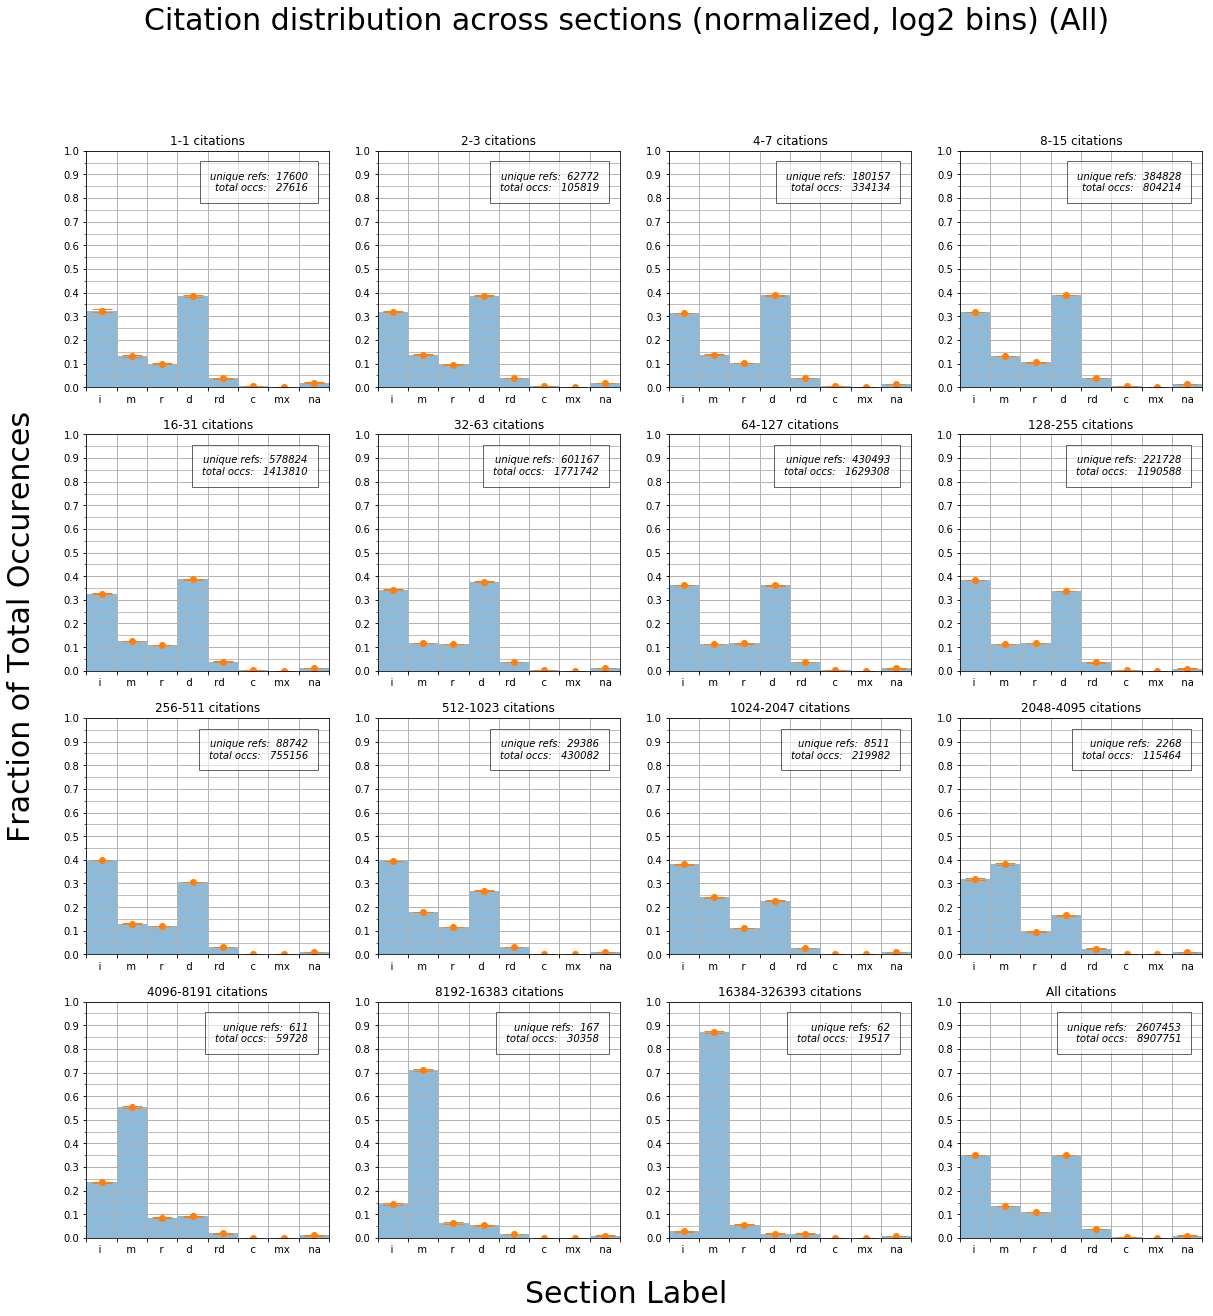

In [8]:
# Plot and save distribution graph:

hist_list, hist_list_raw, count_totals, error_tracker = dist_profile_plotter_error_bars(df_ex, string_selection, '../../plots/example_set/', 1, show = True)

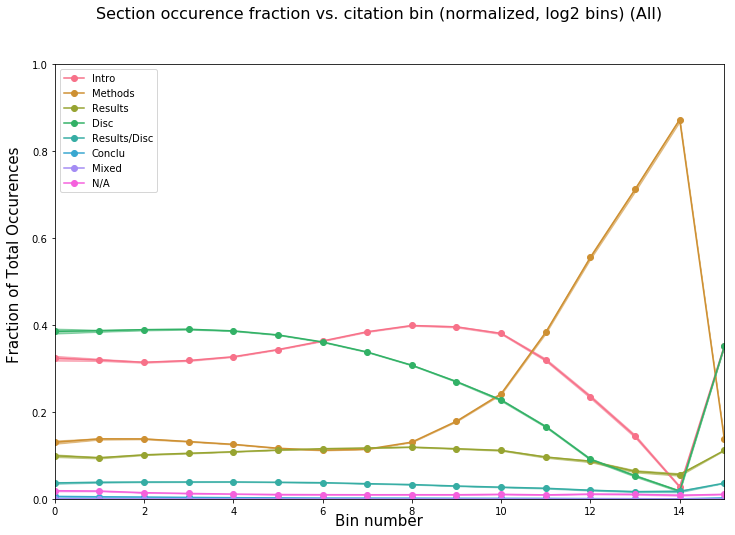

In [10]:
# Plot and save summary graph:
log2_curves_plot(hist_list, error_tracker, string_selection, '../../plots/example_set/', 2, show = True)

In [45]:
np.asarray(hist_list).shape

(16, 8)

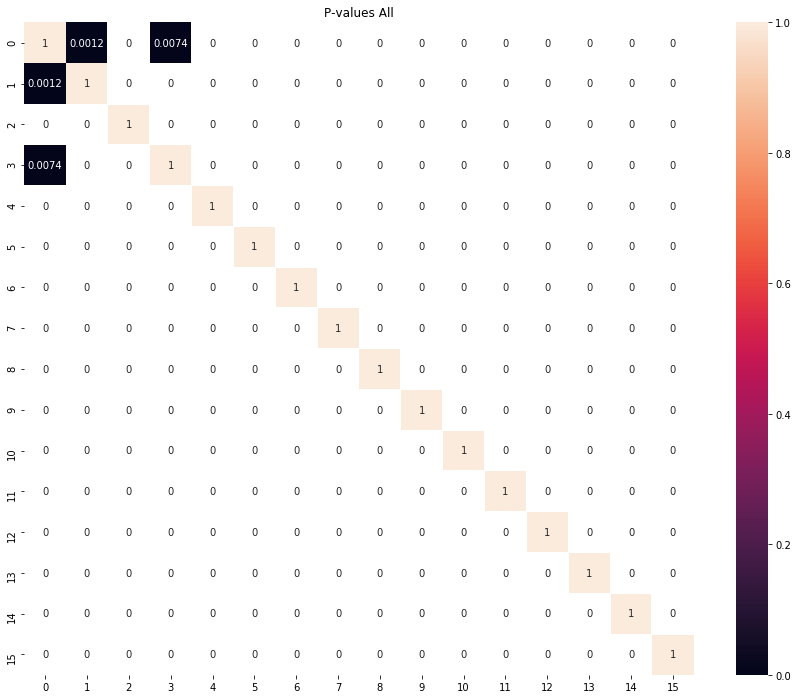

In [13]:
chisqs, p_vals = chisq_matrix(np.asarray(hist_list)[:, 0:4], count_totals)

c, p = make_chi2_table(chisqs, p_vals, string_selection, '../../plots/example_set/', 3, show = True)

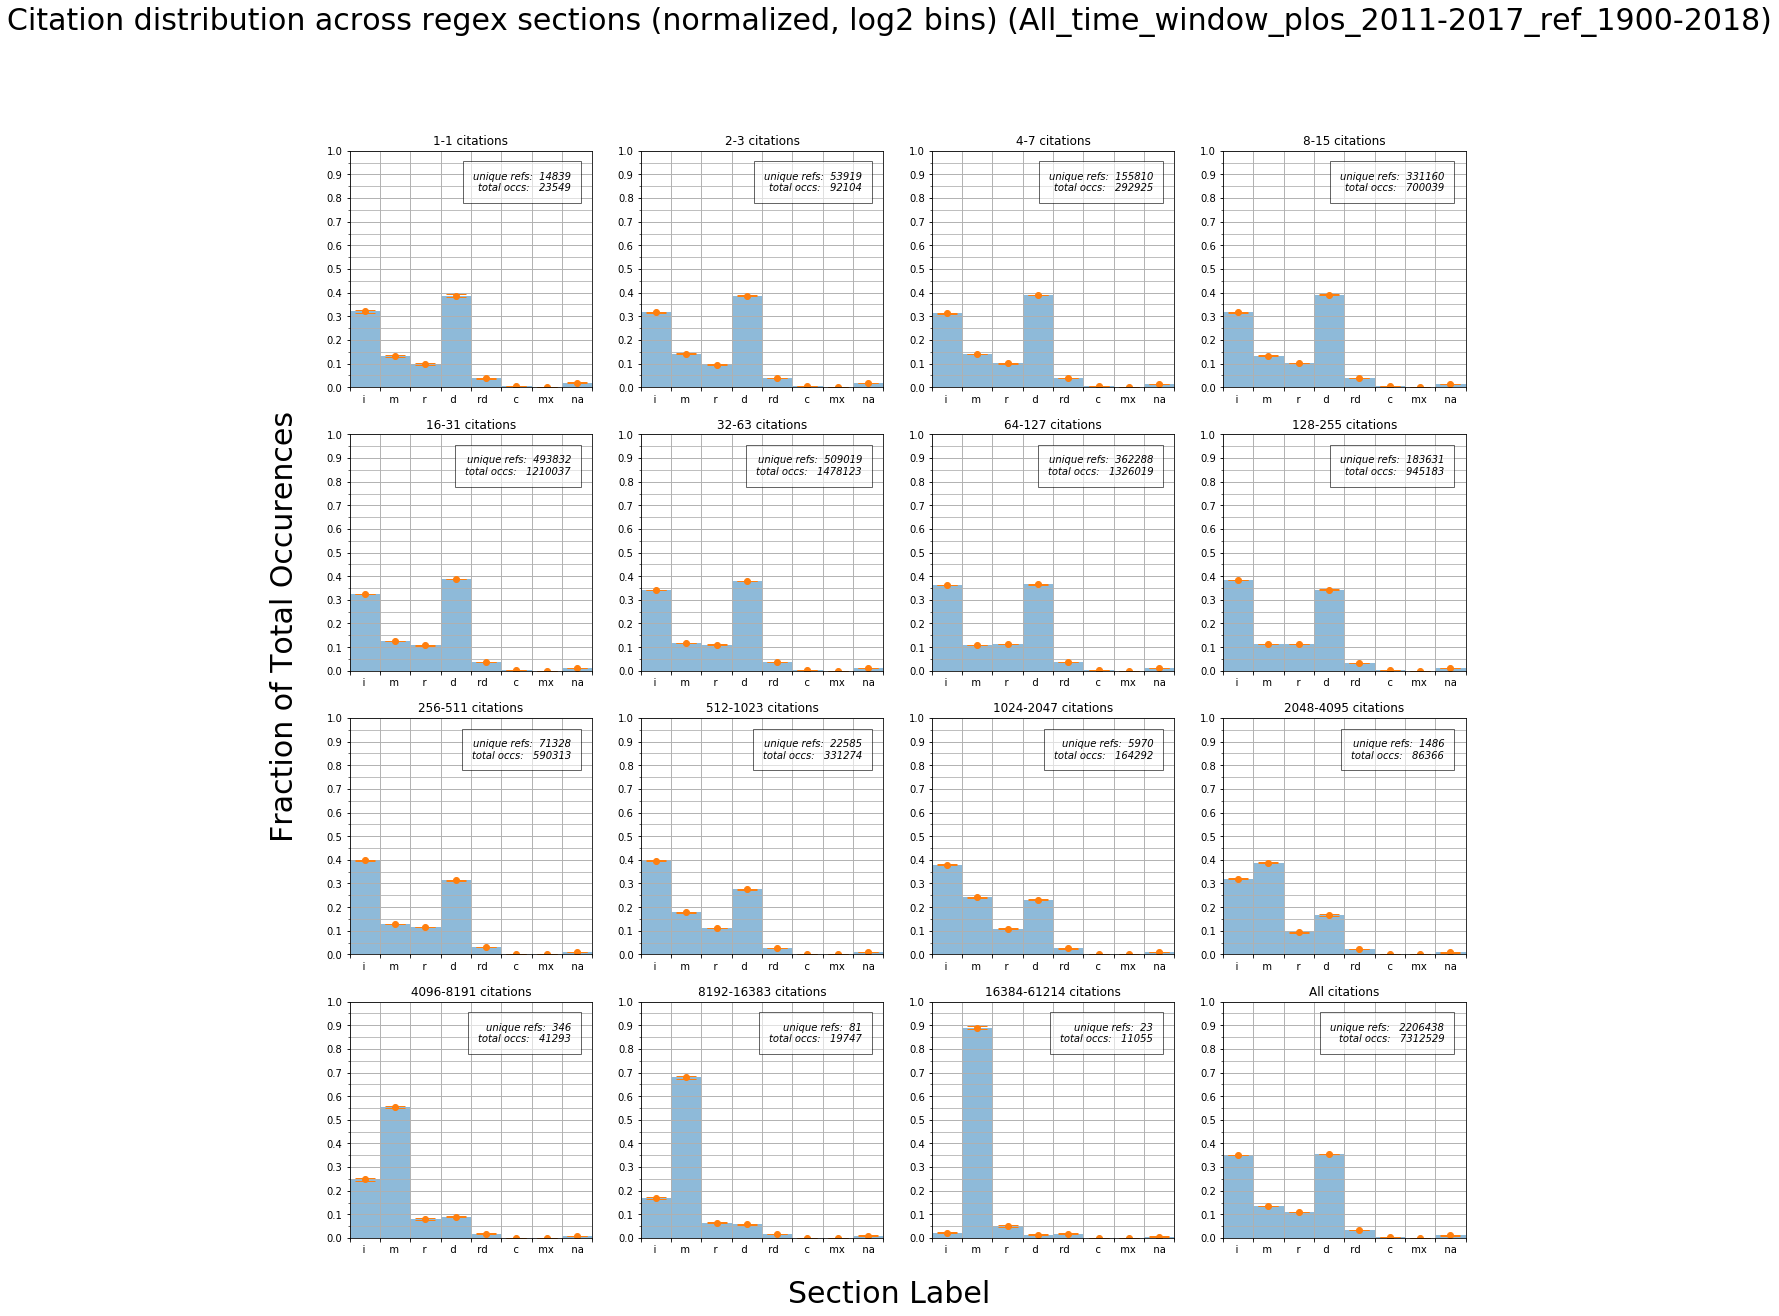

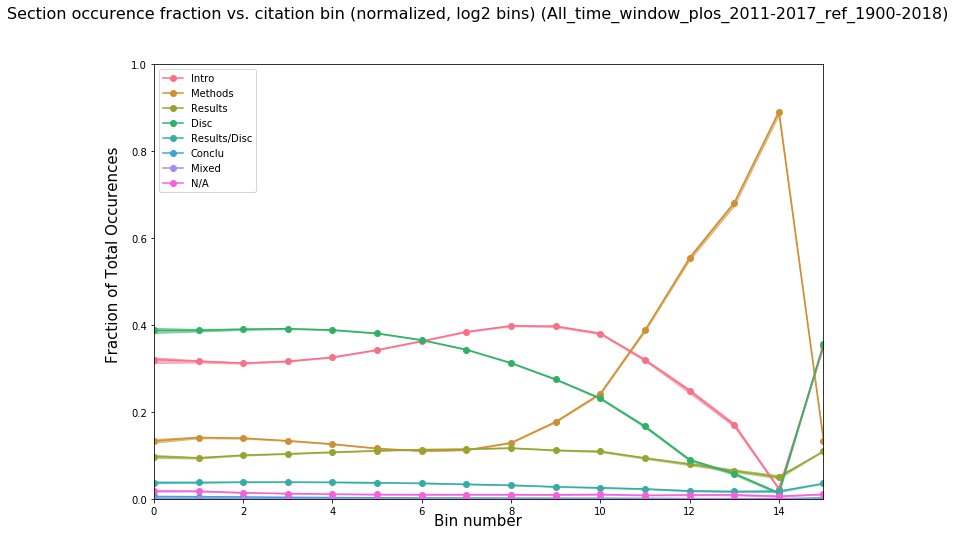

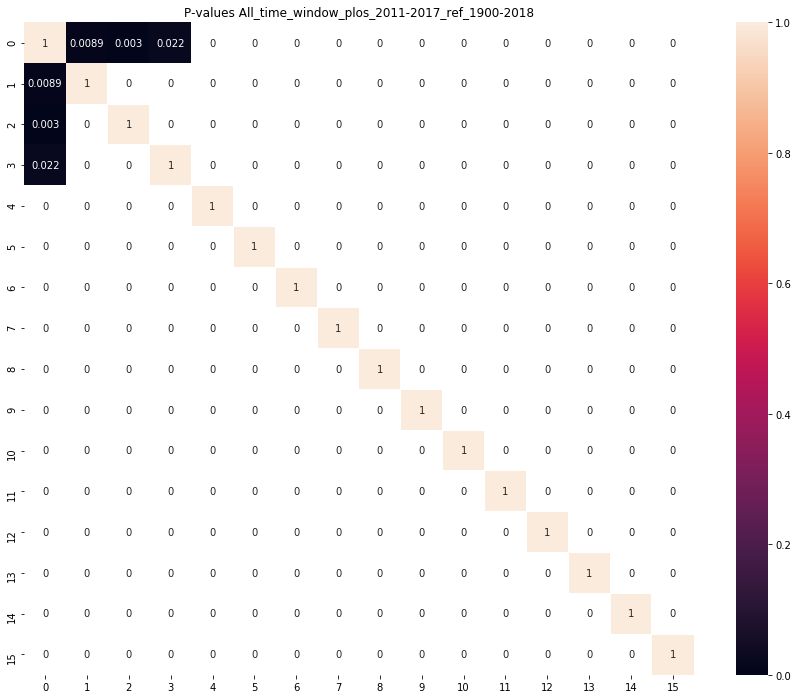

In [38]:
##### This variable allows you to set max and min dates for reference and plos papers. 
# First two are max and min for the PLOS paper, second two are max and min for the reference paper

dt_window = [datetime.datetime(2017,1,1), datetime.datetime(2011,1,1), datetime.datetime(2018,1,1), datetime.datetime(1900,1,1)]


# Function runs above three plots - optional attribute 'show' is set to False by default, so remove that attribute if need lots of files saved
a,b = time_filtered_hist_plotter_matrix_dual_window(df_ex,dt_window[0],dt_window[1],dt_window[2], dt_window[3], '../../plots/example_set/', 4, "time_window", show = True)

In [86]:
df_ex[['paper_UT','reference_UT','occurence','paper_word_pos','paper_word_total','ref_loc_norm','cite_count']].head(100)

,paper_UT,reference_UT,occurence,paper_word_pos,paper_word_total,ref_loc_norm,cite_count
0,324515600133,A1995QY75100004,1,21,3780,0.005556,60.0
1,324515600133,A1995QY75100004,2,2992,3780,0.791534,60.0
2,324515600133,A1995QY75100004,3,3057,3780,0.808730,60.0
3,324515600133,000222499800017,1,42,3780,0.011111,65.0
4,324515600133,000222499800017,2,73,3780,0.019312,65.0
5,324515600133,000222499800017,3,2993,3780,0.791799,65.0
6,324515600133,000222499800017,4,3035,3780,0.802910,65.0
7,324515600133,000222499800017,5,3058,3780,0.808995,65.0
8,324515600133,000263911400006,1,22,3780,0.005820,5.0
9,324515600133,000263911400006,2,74,3780,0.019577,5.0


In [9]:
# new_df=df_ex.groupby('cite_count', as_index=False)['ref_loc_norm'].mean()
# new_df_sem=df_ex.groupby('cite_count', as_index=False)['ref_loc_norm'].sem()


In [20]:
sorted(df_ex.columns)

['cite_count',
 'occurence',
 'paper_UT',
 'paper_char_pos',
 'paper_char_total',
 'paper_cite_count',
 'paper_word_pos',
 'paper_word_total',
 'para_char_pos',
 'para_char_total',
 'para_index',
 'para_word_pos',
 'para_word_total',
 'plos_article_type',
 'plos_datetime',
 'plos_field',
 'plos_j1',
 'plos_j2',
 'plos_j9',
 'plos_ji',
 'plos_pub_date',
 'plos_pub_year',
 'ref_article_type',
 'ref_datetime',
 'ref_field',
 'ref_j1',
 'ref_j2',
 'ref_j9',
 'ref_ji',
 'ref_pub_date',
 'ref_pub_year',
 'reference_UT',
 'reference_rank',
 'regex_sect_index',
 'sect_char_pos',
 'sect_char_total',
 'sect_index',
 'sect_word_pos',
 'sect_word_total',
 'section_title',
 'section_title_alt',
 'total_refs']

In [77]:


trace1= go.Scatter(
        x=new_df['cite_count'],
        y=new_df['paper_char_pos'],
        mode = 'lines+markers',
        error_y=dict(
            type='data',
            array=new_df_std['paper_char_pos'],
            visible=True
        )
    )


layout = Layout(    

   
        xaxis=dict(
            title='number citations',   #"User's university national ranking",
            titlefont=dict(
               # family=font,#family='Arial, sans-serif',
                size=20,
                color='black'
            #    color='lightgrey'
            ),  
            tickfont=dict(   
               # family=font,
                size=10,
                color='black'
            ),
            #type='log'
        ),
        yaxis=dict(
            title='position in section',
            #type='log',
            titlefont=dict(
               # family=font,#family='Arial, sans-serif',
                size=20,
                color='black'
            #    color='lightgrey'
            ),  
            tickfont=dict(   
               # family=10,
                size=10,
                color='black'
            ),
        ),                





    #     bargroupgap=0.1
    )       

data = [trace1]#, trace2]#, trace3]

fig = Figure(data=data, layout=layout)

iplot(fig, filename='testing.html')
#offline.plot(fig, filename='/home/juliaponcela/histogram_'+v1_string+'_by_groups.html')

offline.plot(fig, auto_open=True, image = 'png', image_filename="testing" ,
             output_type='file', image_width=1600, image_height=1200, filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/example_set/testing.html', validate=False)



'file:///home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/example_set/testing.html'

In [24]:
sorted(df_ex.columns)
df_ex['ref_loc_norm']=df_ex['paper_word_pos']/df_ex['paper_word_total']
df_ex['ref_sect_norm']=df_ex['sect_word_pos']/df_ex['sect_word_total']

In [40]:
list_bins=[]

i=1
while i <= 30000:
    pair=[i, i*2-1]
    if i ==16384:
        pair=[i, i*4]
    i = i*2
    list_bins.append(pair)
print (list_bins)


list_years=[]
year=1900
year_bin=5
while year <= 2016:
    pair=[year, year+year_bin-1]
    list_years.append(pair)
    year += year_bin
print (list_years)

[[1, 1], [2, 3], [4, 7], [8, 15], [16, 31], [32, 63], [64, 127], [128, 255], [256, 511], [512, 1023], [1024, 2047], [2048, 4095], [4096, 8191], [8192, 16383], [16384, 65536]]
[[1900, 1904], [1905, 1909], [1910, 1914], [1915, 1919], [1920, 1924], [1925, 1929], [1930, 1934], [1935, 1939], [1940, 1944], [1945, 1949], [1950, 1954], [1955, 1959], [1960, 1964], [1965, 1969], [1970, 1974], [1975, 1979], [1980, 1984], [1985, 1989], [1990, 1994], [1995, 1999], [2000, 2004], [2005, 2009], [2010, 2014], [2015, 2019]]


In [38]:
string_var='paper_word_pos'  # paper_word_pos   sect_word_pos    ref_loc_norm    ref_sect_norm

lista_x=[]
lista_y=[]
lista_sem_y=[]
i=1
for pair in list_bins:
    print (pair)
    minimo=pair[0]
    maximo=pair[1]
    df_select=df_ex[(df_ex['cite_count'] >= minimo ) & (df_ex['cite_count'] <= maximo )]
    
    lista_x.append(i)
    i+=1
    y=df_select[string_var].mean()
    sem=df_select[string_var].sem()
    
    lista_y.append(y)
    lista_sem_y.append(sem)

    
    
    


trace1= go.Scatter(
        x=lista_x,
        y=lista_y,
        mode = 'lines+markers',
        error_y=dict(
            type='data',
            array=lista_sem_y,
            visible=True
        )
    )


layout = Layout(    

   
        xaxis=dict(
            title='Log2 bin number citations',   #"User's university national ranking",
            titlefont=dict(
               # family=font,#family='Arial, sans-serif',
                size=20,
                color='black'
            #    color='lightgrey'
            ),  
            tickfont=dict(   
               # family=font,
                size=10,
                color='black'
            ),
            #type='log'
        ),
        yaxis=dict(
            title=string_var,
            #type='log',
            titlefont=dict(
               # family=font,#family='Arial, sans-serif',
                size=20,
                color='black'
            #    color='lightgrey'
            ),  
            tickfont=dict(   
               # family=10,
                size=10,
                color='black'
            ),
        ),                

    #     bargroupgap=0.1
    )       

data = [trace1]#, trace2]#, trace3]

fig = Figure(data=data, layout=layout)

iplot(fig, filename='testing_log2_bin_citations_vs_'+string_var+'.html')
#offline.plot(fig, filename='/home/juliaponcela/histogram_'+v1_string+'_by_groups.html')

offline.plot(fig, auto_open=True, image = 'png', image_filename="testing" ,
             output_type='file', image_width=1600, image_height=1200, filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/example_set/testing_log2_bin_citations_vs_'+string_var+'.html', validate=False)



[1, 1]
[2, 3]
[4, 7]
[8, 15]
[16, 31]
[32, 63]
[64, 127]
[128, 255]
[256, 511]
[512, 1023]
[1024, 2047]
[2048, 4095]
[4096, 8191]
[8192, 16383]
[16384, 65536]


'file:///home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/example_set/testing_log2_bin_citations_vs_paper_word_pos.html'

In [39]:
sorted(df_ex.columns)

['cite_count',
 'occurence',
 'paper_UT',
 'paper_char_pos',
 'paper_char_total',
 'paper_cite_count',
 'paper_word_pos',
 'paper_word_total',
 'para_char_pos',
 'para_char_total',
 'para_index',
 'para_word_pos',
 'para_word_total',
 'plos_article_type',
 'plos_datetime',
 'plos_field',
 'plos_j1',
 'plos_j2',
 'plos_j9',
 'plos_ji',
 'plos_pub_date',
 'plos_pub_year',
 'ref_article_type',
 'ref_datetime',
 'ref_field',
 'ref_j1',
 'ref_j2',
 'ref_j9',
 'ref_ji',
 'ref_loc_norm',
 'ref_pub_date',
 'ref_pub_year',
 'ref_sect_norm',
 'reference_UT',
 'reference_rank',
 'regex_sect_index',
 'sect_char_pos',
 'sect_char_total',
 'sect_index',
 'sect_word_pos',
 'sect_word_total',
 'section_title',
 'section_title_alt',
 'total_refs']

In [41]:
string_var='paper_word_pos'  # paper_word_pos   sect_word_pos    ref_loc_norm    ref_sect_norm

lista_x=[]
lista_y=[]
lista_sem_y=[]
i=1
for pair in list_years:
    print (pair)
    minimo=pair[0]
    maximo=pair[1]
    df_select=df_ex[(df_ex['ref_pub_year'] >= minimo ) & (df_ex['ref_pub_year'] <= maximo )]
    
    lista_x.append(i)
    i+=1
    y=df_select[string_var].mean()
    sem=df_select[string_var].sem()
    
    lista_y.append(y)
    lista_sem_y.append(sem)

    
    
    


trace1= go.Scatter(
        x=lista_x,
        y=lista_y,
        mode = 'lines+markers',
        error_y=dict(
            type='data',
            array=lista_sem_y,
            visible=True
        )
    )


layout = Layout(    

   
        xaxis=dict(
            title="reference's publication year",   #"User's university national ranking",
            titlefont=dict(
               # family=font,#family='Arial, sans-serif',
                size=20,
                color='black'
            #    color='lightgrey'
            ),  
            tickfont=dict(   
               # family=font,
                size=10,
                color='black'
            ),
            #type='log'
        ),
        yaxis=dict(
            title=string_var,
            #type='log',
            titlefont=dict(
               # family=font,#family='Arial, sans-serif',
                size=20,
                color='black'
            #    color='lightgrey'
            ),  
            tickfont=dict(   
               # family=10,
                size=10,
                color='black'
            ),
        ),                

    #     bargroupgap=0.1
    )       

data = [trace1]#, trace2]#, trace3]

fig = Figure(data=data, layout=layout)

iplot(fig, filename='testing_log2_bin_citations_vs_'+string_var+'.html')
#offline.plot(fig, filename='/home/juliaponcela/histogram_'+v1_string+'_by_groups.html')

offline.plot(fig, auto_open=True, image = 'png', image_filename="testing" ,
             output_type='file', image_width=1600, image_height=1200, filename='/home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/example_set/testing_log2_bin_citations_vs_'+string_var+'.html', validate=False)



[1900, 1904]
[1905, 1909]
[1910, 1914]
[1915, 1919]
[1920, 1924]
[1925, 1929]
[1930, 1934]
[1935, 1939]
[1940, 1944]
[1945, 1949]
[1950, 1954]
[1955, 1959]
[1960, 1964]
[1965, 1969]
[1970, 1974]
[1975, 1979]
[1980, 1984]
[1985, 1989]
[1990, 1994]
[1995, 1999]
[2000, 2004]
[2005, 2009]
[2010, 2014]
[2015, 2019]


'file:///home/staff/julia/at_Northwestern/In_Text_Citations/In-Text-Citations-New/plots/example_set/testing_log2_bin_citations_vs_paper_word_pos.html'